# Modeling

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# reading in the total_combined_dfs dataframe

total_combined_dfs = pd.read_csv('./../data/total_combined_dfs.csv')

In [3]:
total_combined_dfs.head()

,title,subreddit,selftext,subreddit_id,text_length,word_count,title_plus_selftext
0,2023 Offseason Review: Minnesota Vikings,nfl,# [Series Hub](https://www.reddit.com/r/nfl/co...,t5_2qmg3,12954,1676,2023 Offseason Review: Minnesota Vikings# [Ser...
1,2023 Offseason Review: San Francisco 49ers,nfl,#San Francisco 49ers Offseason Review\n\n##[Se...,t5_2qmg3,39725,6053,2023 Offseason Review: San Francisco 49ers#San...
2,Tua Tagovailoa says everything he did this off...,nfl,&gt;Tagovailoa also talked about choosing a ne...,t5_2qmg3,249,43,Tua Tagovailoa says everything he did this off...
3,[Glaser] “Zach Wilson has played really well i...,nfl,NaN,t5_2qmg3,0,1,[Glaser] “Zach Wilson has played really well i...
4,[JacobWestendorf] #Broncos RB Terrell Davis pl...,nfl,NaN,t5_2qmg3,0,1,[JacobWestendorf] #Broncos RB Terrell Davis pl...


In [4]:
# checking to see if my work on the previous notebook carrier over properly

total_combined_dfs.isnull().sum()

# it did not, so filling the nulls again in the cell below

title                     0
subreddit                 0
selftext               1643
subreddit_id              0
text_length               0
word_count                0
title_plus_selftext       0
dtype: int64

In [5]:
total_combined_dfs.fillna('', inplace = True)

In [6]:
# checking null count again

total_combined_dfs.isnull().sum()

title                  0
subreddit              0
selftext               0
subreddit_id           0
text_length            0
word_count             0
title_plus_selftext    0
dtype: int64

In [7]:
total_combined_dfs.head()

,title,subreddit,selftext,subreddit_id,text_length,word_count,title_plus_selftext
0,2023 Offseason Review: Minnesota Vikings,nfl,# [Series Hub](https://www.reddit.com/r/nfl/co...,t5_2qmg3,12954,1676,2023 Offseason Review: Minnesota Vikings# [Ser...
1,2023 Offseason Review: San Francisco 49ers,nfl,#San Francisco 49ers Offseason Review\n\n##[Se...,t5_2qmg3,39725,6053,2023 Offseason Review: San Francisco 49ers#San...
2,Tua Tagovailoa says everything he did this off...,nfl,&gt;Tagovailoa also talked about choosing a ne...,t5_2qmg3,249,43,Tua Tagovailoa says everything he did this off...
3,[Glaser] “Zach Wilson has played really well i...,nfl,,t5_2qmg3,0,1,[Glaser] “Zach Wilson has played really well i...
4,[JacobWestendorf] #Broncos RB Terrell Davis pl...,nfl,,t5_2qmg3,0,1,[JacobWestendorf] #Broncos RB Terrell Davis pl...


In [8]:
# checking shape of dataframe

total_combined_dfs.shape

(2692, 7)

## Bernoulli Naive Bayes

I chose to use a Bernoulli Naive Bayes model to model this data because after vectorization, our dataframe has 0 or 1 values in our features. Additionally, it is a fast modeling algorithm which is beneficial due to the number of features we have after vectorization. Lastly, it is known as an excellent classifier.

In [9]:
# Setting up our X and y for Naive Bayes and tf-idf modeling

nb_X = total_combined_dfs['title_plus_selftext']
nb_y = total_combined_dfs['subreddit']

In [10]:
# Checking our baseline

nb_y.value_counts(normalize= True)

nba    0.527489
nfl    0.472511
Name: subreddit, dtype: float64

In [11]:
# splitting our data into training and testing sets

nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, stratify = nb_y, random_state= 42)

In [12]:
# setting up stop-words variable for parameters

default_stop_words3 = CountVectorizer(stop_words='english').get_stop_words()

custom_stop_words3 = ['nba', 'com', 'https', 'like', 'reddit', 'amp', 'comments', 'like', 'nfl', 'www', 'utm_source', 'utm_medium', 'web2x']

ngram_stop_words_total = list(default_stop_words3) + custom_stop_words3

In [13]:
# setting up pipeline

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [36]:
# setting parameters

pipe_tvec_params = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__stop_words': [None, 'english', ngram_stop_words_total],
    'tvec__ngram_range': [(1, 1), (1, 2)],
}


In [37]:
# Gridsearching

gs_tvec = GridSearchCV(pipe_tvec,
                      param_grid=pipe_tvec_params,
                      cv = 5)

In [38]:
# Fit GridSearch to training data.
gs_tvec.fit(nb_X_train, nb_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english',
                                              ['thin', 'up', 'otherwise', 'by',
                                               'only', 'ours', 'five', 'six',
                                               'two', 'toward', 'from',
                                               'anyone', 'onto', 'because',
                                               'sixty', 'beforehand', 'nothing',
                                               'on', 'yourselves', 'none',
                                               'any', 'could', 'must', 'since',
                                               'hereupon', 'whereas', 'mill',
                                               'to', 'twelve', 'here', ...]]})

In [39]:
gs_tvec.best_params_

{'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [17]:
# Score model on training set.
gs_tvec.score(nb_X_train, nb_y_train)

0.9811788013868251

In [18]:
# Score model on testing set.
gs_tvec.score(nb_X_test, nb_y_test)

0.962852897473997

We can see that the Bernoulli Naive Bayes model performed very well on both our training and testing data, having an accuracy score of .98 and .96 respectively, after rounding. These scores are satisfactory regarding our measure of success for this project.

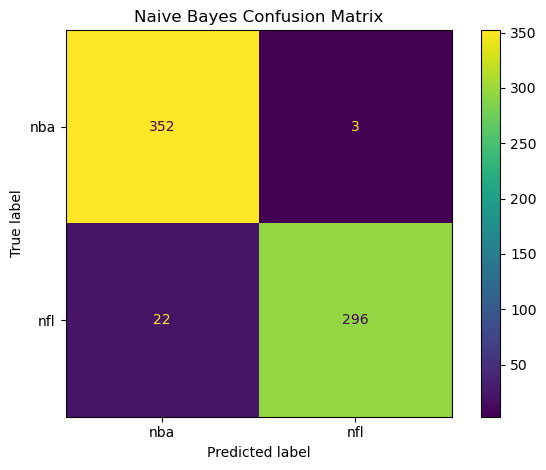

In [19]:
# building confusion matrix

ConfusionMatrixDisplay.from_estimator(gs_tvec, nb_X_test, nb_y_test);

plt.title('Naive Bayes Confusion Matrix');

plt.tight_layout()
plt.savefig('./../images/naivebayes_cm.png');

The above confusion matrix visualizes how well our model performed in regard to accuracy, with true positive and true negative being 648 out of 673 predictions.

### Logistic Regression

I chose to use logistic regression as one of my models because of it's simplicity and efficiency. Additionally, our features after vectorization are well-suited for a classification model such as logistic regression.

In [20]:
# Setting up our X and y for LogReg and tf-idf modeling

lr_X = total_combined_dfs['title_plus_selftext']
lr_y = total_combined_dfs['subreddit']

In [21]:
# Checking our baseline

lr_y.value_counts(normalize= True)

nba    0.527489
nfl    0.472511
Name: subreddit, dtype: float64

In [22]:
# splitting our data into training and testing sets

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, stratify = lr_y, random_state= 42)

In [23]:
# setting up pipeline

pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [24]:
# setting parameters

pipe2_params = {
    'tvec__max_features': [2000, 3000, 4000],
    'tvec__stop_words': [None, 'english', custom_stop_words3],
    'tvec__min_df': [2, 4],
    'tvec__max_df': [1.0, 0.8, 0.5],
}

In [25]:
# Gridsearching

gs2 = GridSearchCV(pipe2,
                 param_grid=pipe2_params,
                 n_jobs = -1)

gs2.fit(lr_X_train, lr_y_train)
print(gs2.best_score_) # through cross-val
gs2.best_params_

0.9524555929538362


{'tvec__max_df': 1.0,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__stop_words': 'english'}

In [26]:
# printing training and testing accuracy scores

print(gs2.score(lr_X_train, lr_y_train))
print(gs2.score(lr_X_test, lr_y_test))

0.9930658741951461
0.9569093610698366


In [40]:
gs2.best_params_

{'tvec__max_df': 1.0,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__stop_words': 'english'}

Similarly to the Naive Bayes model above, our logistic regression model performed very well on both our training and testing data, having an accuracy score of .99 and .96 respectively, after rounding. Again, these scores are satisfactory regarding our measure of success for this project.

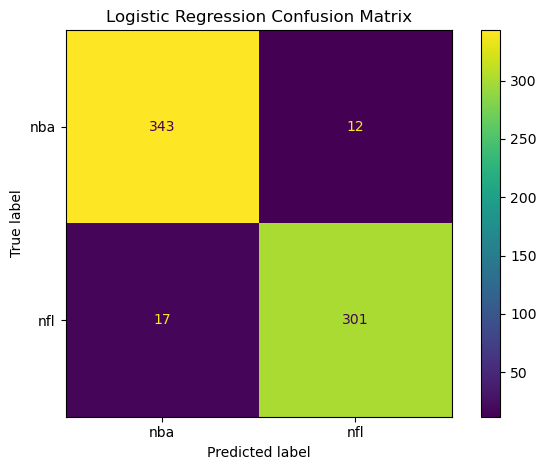

In [27]:
# building confusion matrix

ConfusionMatrixDisplay.from_estimator(gs2, lr_X_test, lr_y_test);

plt.title('Logistic Regression Confusion Matrix');

plt.tight_layout()
plt.savefig('./../images/logreg_cm.png');

As above, our confusion matrix visualizes how well our model performed in regard to accuracy, with true positive and true negative being 644 out of 673 predictions.

### Random Forests

I chose to use a random forests model in addition to the two models above to see if this model would handle the complex, non-linear relationships in our data better, to see if it could combat the slight class imbalance in our y, and in case there were any prominent outliers.

In [28]:
# Setting up our X and y for LogReg and tf-idf modeling

rf_X = total_combined_dfs['title_plus_selftext']
rf_y = total_combined_dfs['subreddit']

In [29]:
# Checking our baseline

rf_y.value_counts(normalize= True)

nba    0.527489
nfl    0.472511
Name: subreddit, dtype: float64

In [30]:
# splitting our data into training and testing sets

rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, stratify = rf_y, random_state= 42)

In [31]:
# setting up pipeline

pipe3 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [32]:
# setting parameters

pipe3_params = {
    'rf__n_estimators': [100, 150, 200],
    'tvec__stop_words': [None, 'english', custom_stop_words3],
    'rf__max_depth': [None, 1, 2, 3, 4, 5]
}

In [33]:
# Gridsearching

gs3 = GridSearchCV(pipe3,
                 param_grid=pipe3_params,
                 cv = 5)

gs3.fit(rf_X_train, rf_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__stop_words': [None, 'english',
                                              ['nba', 'com', 'https', 'like',
                                               'reddit', 'amp', 'comments',
                                               'like', 'nfl', 'www',
                                               'utm_source', 'utm_medium',
                                               'web2x']]})

In [34]:
# printing training and testing accuracy scores

print(gs3.score(rf_X_train, rf_y_train))
print(gs3.score(rf_X_test, rf_y_test))

1.0
0.9331352154531947


In [41]:
gs3.best_params_

{'rf__max_depth': None, 'rf__n_estimators': 200, 'tvec__stop_words': 'english'}

As seem above, our Random Forests model performed perfectly on our training data (score of 1.0), but had a drop in our testing score (score of .93 after rounding). This tells us that our model might be somewhat overfit, and we would need to adjust our model if we wanted to move foward using this. This model does not meet our criteria of success.

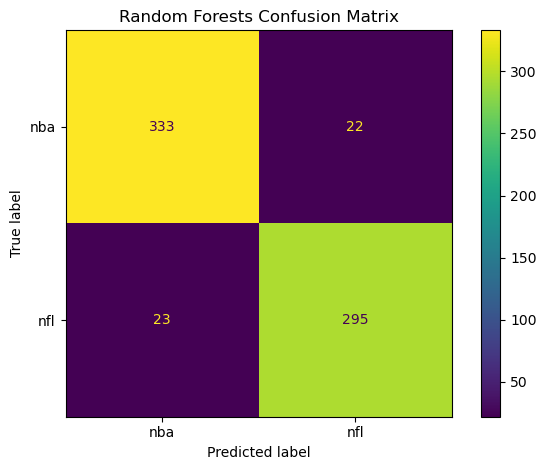

In [35]:
# building confusion matrix

ConfusionMatrixDisplay.from_estimator(gs3, rf_X_test, rf_y_test);

plt.title('Random Forests Confusion Matrix');

plt.tight_layout()
plt.savefig('./../images/rf_cm.png');

As in the above two, this confusion matrix visualizes how well our model performed in regard to accuracy, with true positive and true negative being 625 out of 673 predictions. Although, it performs the most poorly in comparision to the other two confusion matrices related to our other models.